In [1]:
import pyift.pyift as ift
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.style.use('fivethirtyeight')

In [2]:
# Helper funcionts
def show(img, dpi=125):
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    frame.figure.set_dpi(125)
    frame.axes.imshow(img)
    plt.show()

def imageOverlay(original, label):
    A = ift.Circular(1.0)
    tmp = ift.CopyImage(original)
    cmap = ift.CreateColorTable(ift.MaximumValue(label) + 1)
    ift.DrawLabels(tmp, label, cmap, A, True, 0.2)
    show(tmp.ToPlot())

In [3]:
# Input
img_path = '/home/jordao/Documents/grabcut/orig/000001_000008.png'
obj_path = ''
gt_path = '/home/jordao/Documents/grabcut/labels/000001_000008.png'

# Segmentation Parameters
A = ift.Circular(1.0)
gamma = 0.25
alpha = 0.5

# Robot Parameters
iterations = 15
accuracy = 0.99
marker_radii = 1.0
marker_max_radii = 4.0
seeds_per_ite = 1

# Draw Parameter
B = ift.Circular(4.0)

In [4]:
# Init
bot = ift.CreateRobot(img_path, gt_path, iterations, accuracy)
mimg = ift.ImageToMImage(bot.orig, ift.LABNorm_CSPACE)
objmap = None # ift.ReadImageByExt(obj_path)
ctb = ift.CreateColorTable(2)

bot.setMarkerRadius(ift.Circular(marker_radii))
bot.setMarkerMaxRadius(ift.Circular(marker_max_radii))
bot.setSeeds(None)
bot.max_seed_per_iter = seeds_per_ite

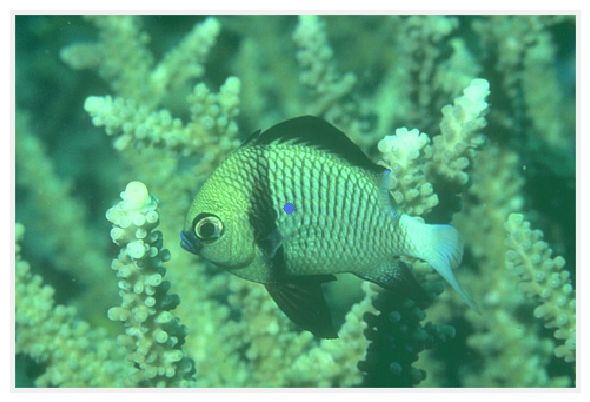

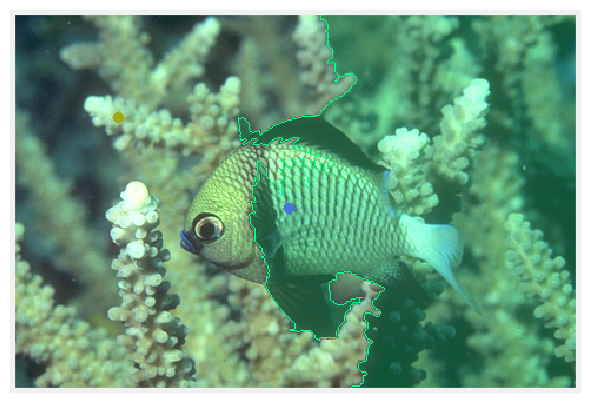

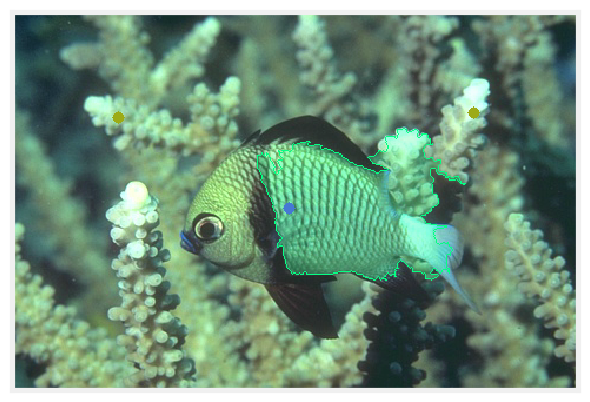

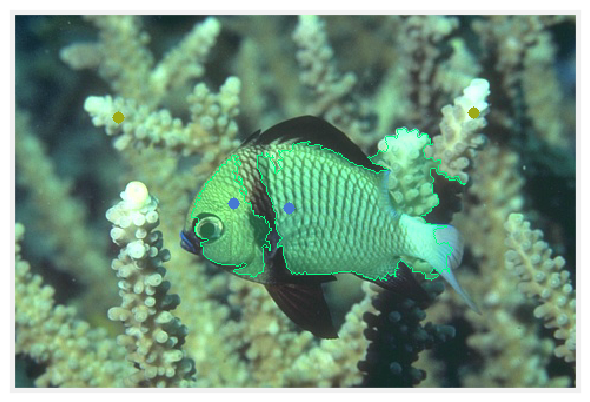

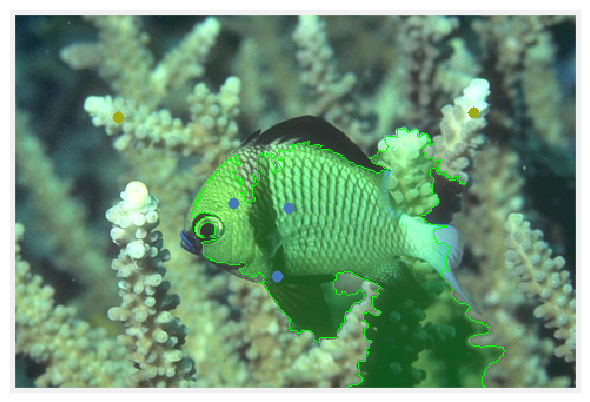

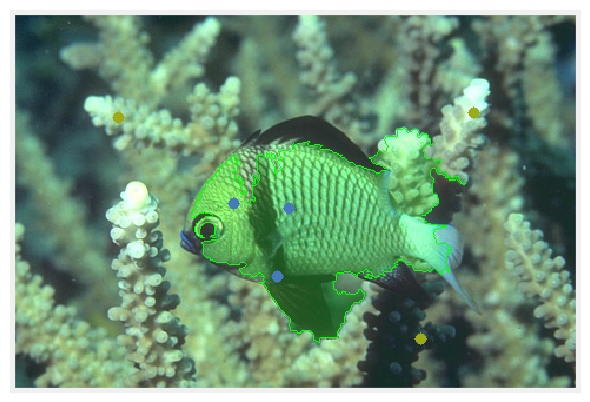

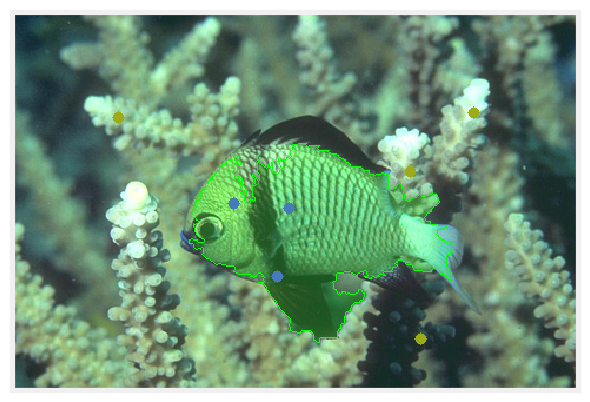

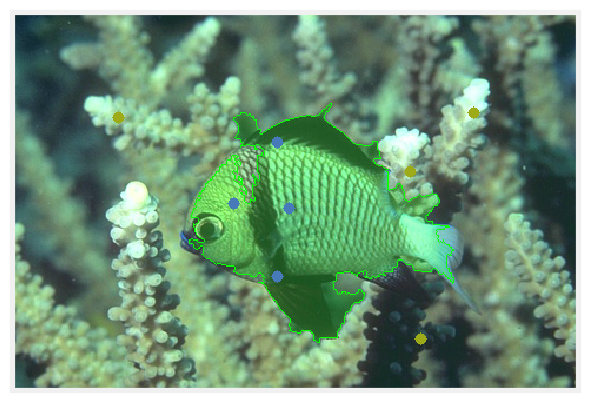

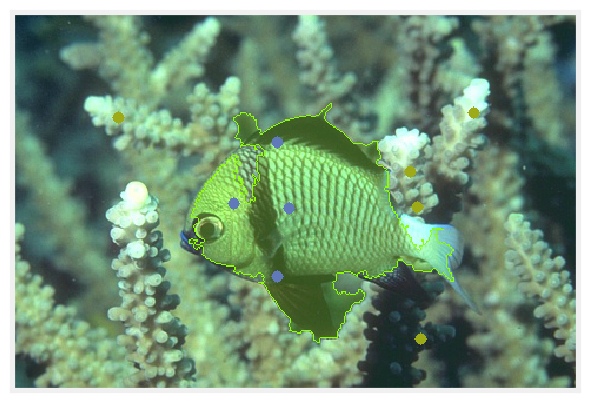

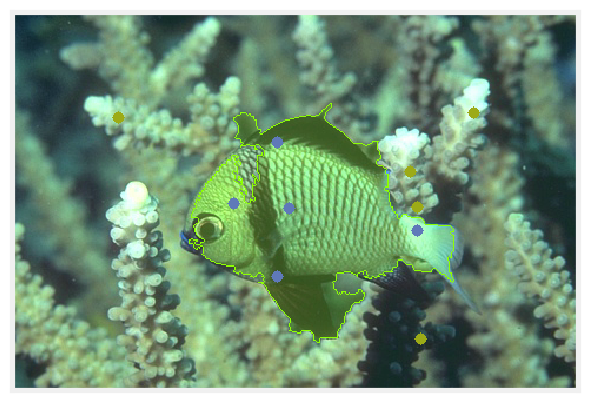

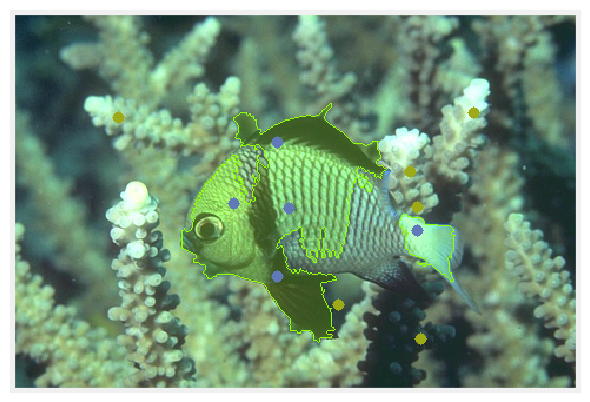

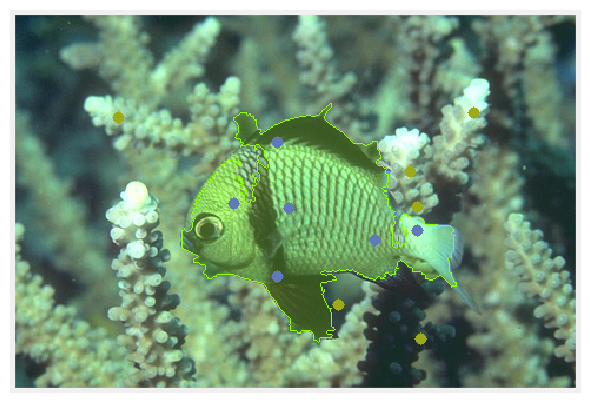

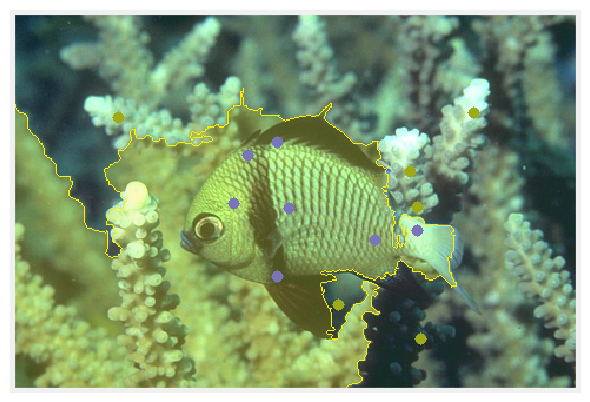

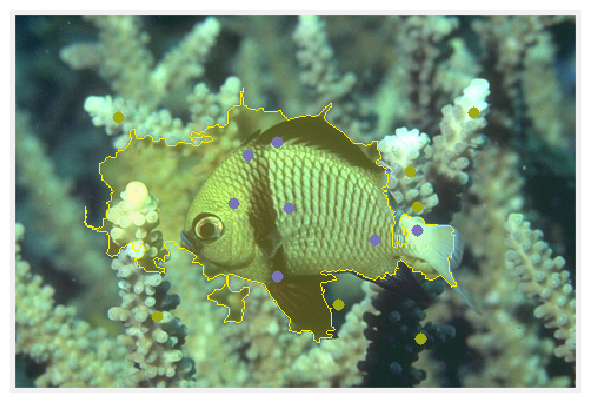

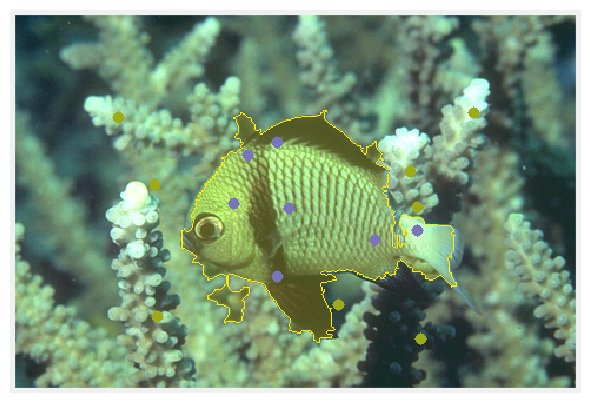

In [5]:
# ift.ResetRobotSegmentation(bot) # ATTENTION this deletes SEEDS!!
# ATTENTION Remember to reset the robot with iftResetRobotSegmentation
# before re-running this chunk
ift.RobotUpdateError(bot)
ift.RobotFindSeedsMSSkel(bot)

acc = []
while ift.RobotContinue(bot):
    segm = ift.DynTreeRoot(mimg, A, bot.seeds, 1, gamma, objmap, alpha)
    
    seeds_img = ift.DrawDilatedSeeds(bot.orig, bot.seeds, B, ctb)
    imageOverlay(seeds_img, segm)
    
    bot.setSegm(segm)
    ift.RobotUpdateError(bot)
    
    acc.append(bot.cur_acur)
    ift.RobotFindSeedsMSSkel(bot)
    if bot.converged:
        bot.converged = False
        ift.RobotFindSeedsCenterOfMass(bot)

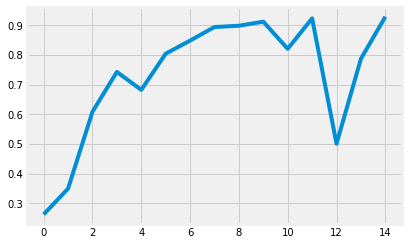

In [6]:
acc = np.asarray(acc)
plt.plot(acc)